### Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.


So this dataset designed to understand the factors that lead a person will work for the company , by model(s) that uses the current credentials/demographics/experience to predict the probability of a candidate to look for a new job or will work for the company.


The whole data divided to train and test . Target isn't included in test but the target values is in hands for related tasks. I provided a sample submission corresponds to enrolleeid of test set too ( enrolleid - target)

#### Also:

The dataset is imbalanced
Most features are categorical, some with high cardinality

## My Task:
- Predict the probability of a candidate will work for the company
- Interpret models such a way that illustrate which features affects candidate decision


- This is a Supervised Classification Task

In [1]:
# For Dataframing
import pandas as pd

In [2]:
test = pd.read_csv('data/aug_test.csv')
train = pd.read_csv('data/aug_train.csv')

In [3]:
print('Test Shape')
print(test.shape)

Test Shape
(2129, 13)


In [4]:
print('Train Shape')
print(train.shape)
train.head()

Train Shape
(19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
# Separate Target and Features
y = train['target']
X = train.drop('target', axis=1)

In [6]:
# List Features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [7]:
X.describe()

,enrollee_id,city_development_index,training_hours
count,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896
std,9616.292592,0.123362,60.058462
min,1.000000,0.448000,1.000000
25%,8554.250000,0.740000,23.000000
50%,16982.500000,0.903000,47.000000
75%,25169.750000,0.920000,88.000000
max,33380.000000,0.949000,336.000000


In [8]:
# Examine Target
y.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [9]:
# Percent Positive
print("Percent Positive Targets:")
percent_pos = y.value_counts()[1]/len(y)
percent_pos

Percent Positive Targets:


0.24934753105752167

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

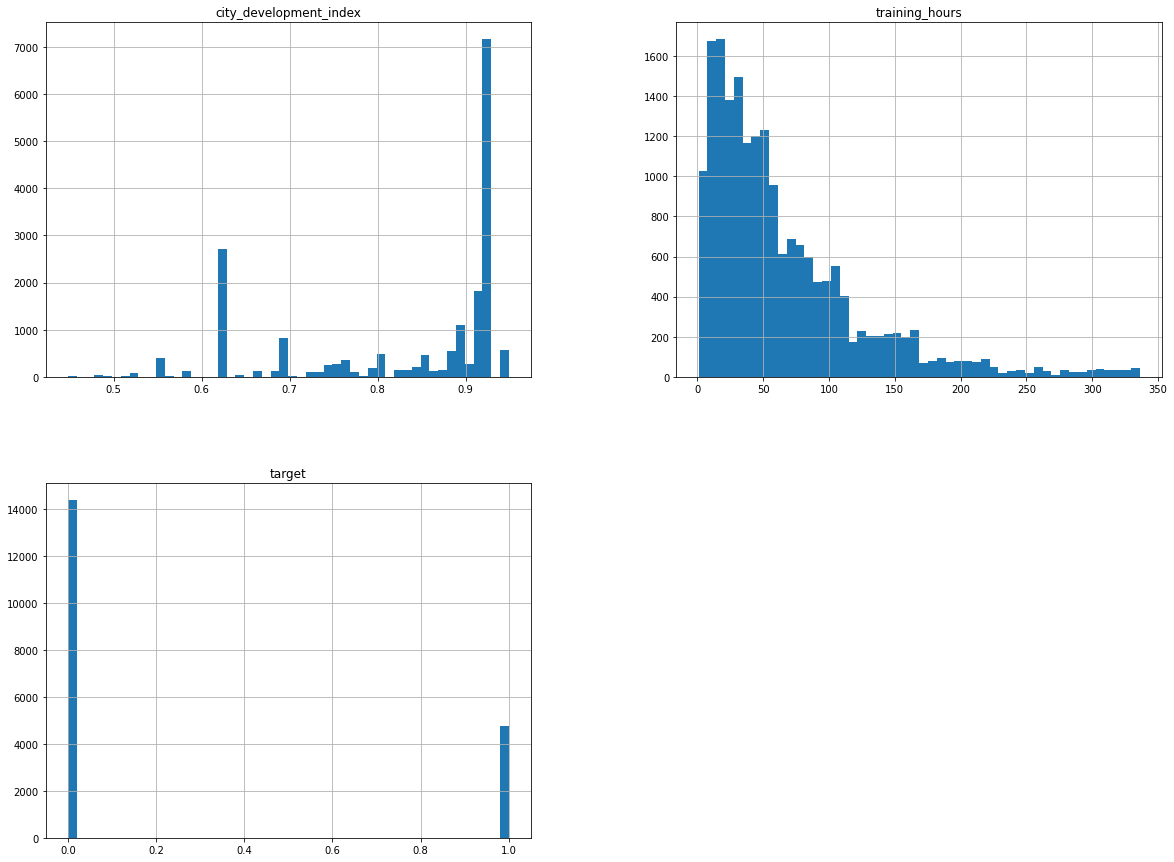

In [48]:
# Plot Numerical Variables
%matplotlib inline
import matplotlib.pyplot as plt
train.drop('enrollee_id', axis=1).hist(bins=50, figsize=(20, 15))
plt.show()

In [12]:
import helpers.cardinality as crd
crd.cardinality_report(train)

-------------
COLUMN: relevent_experience
nUnique: 2
--- TOP 5 ---
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


-------------
COLUMN: gender
nUnique: 3
--- TOP 5 ---
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


-------------
COLUMN: enrolled_university
nUnique: 3
--- TOP 5 ---
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64


-------------
COLUMN: education_level
nUnique: 5
--- TOP 5 ---
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


-------------
COLUMN: major_discipline
nUnique: 6
--- TOP 5 ---
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
Name: major_discipline, dtype: int64


-------------
COLUMN: company_type
nUnique: 6
--- TOP 5 --

In [20]:
ranked = crd.rank_cardinality(train)
low_crd = ranked[:-1]
low_crd

['relevent_experience',
 'gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_type',
 'last_new_job',
 'company_size',
 'experience']

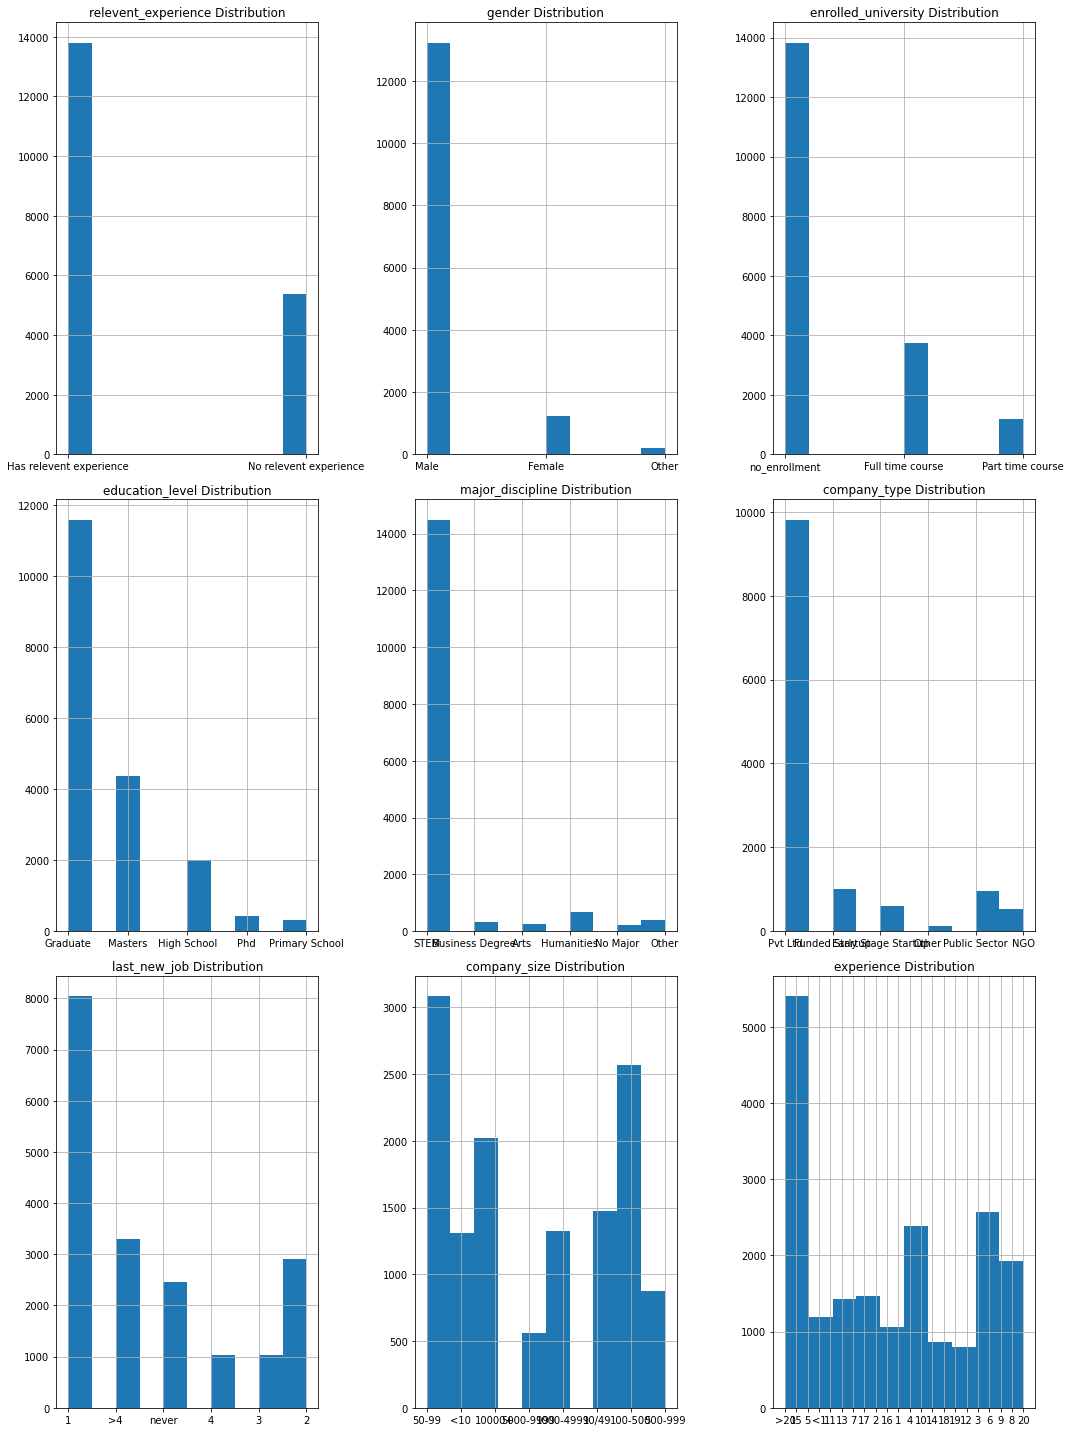

In [45]:
# Plot Categorical Variables
%matplotlib inline
import matplotlib.pyplot as plt
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(train, low_crd, 3, 3)

In [49]:
# Separate Val and Train
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, test_size=0.2, random_state=42)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# TODO:
# Establish Baseline